In [ ]:
!pip install tensorflow
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joashmuganda","key":"b24cac2c54532e2fc28064e269bcdd07"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection -p /content


 32% 9.00M/28.4M [00:00<00:00, 92.5MB/s]
100% 28.4M/28.4M [00:00<00:00, 148MB/s] 


In [ ]:
!unzip -q /content/fruit-images-for-object-detection.zip -d /content/fruit-dataset


In [ ]:
!ls /content/fruit-dataset


test_zip  train_zip


In [ ]:
import os
import shutil

# Define your base directory where images are stored
base_dir = '/content/fruit-dataset/train_zip/train'

# List of all files in the base directory
files = os.listdir(base_dir)

# Loop over all files
for file in files:
    # Assuming class names are at the start of the filenames followed by an underscore
    class_name = file.split('_')[0]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the file into the class directory
    shutil.move(os.path.join(base_dir, file), os.path.join(class_dir, file))


In [ ]:
import os
import shutil

# Define the base directory where test images are stored
base_dir = '/content/fruit-dataset/test_zip/test'  # Adjusted for test data

# List of all files in the base directory
files = os.listdir(base_dir)

# Loop over all files
for file in files:
    # Assuming class names are at the start of the filenames followed by an underscore
    class_name = file.split('_')[0]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the file into the class directory
    shutil.move(os.path.join(base_dir, file), os.path.join(class_dir, file))



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size and dimensions for the images
batch_size = 32
img_height = 224  # Adjust based on your model's expected input
img_width = 224   # Adjust based on your model's expected input

# Create an ImageDataGenerator for the training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an ImageDataGenerator for the test data without data augmentation, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the 'train' directory and apply transformations
train_generator = train_datagen.flow_from_directory(
    '/content/fruit-dataset/train_zip/train',  # Updated path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load images from the 'test' directory
test_generator = test_datagen.flow_from_directory(
    '/content/fruit-dataset/test_zip/test',  # Updated path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [ ]:
!ls /content/fruit-dataset/train_zip/train


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming you have 4 classes
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs based on your requirement
    validation_data=test_generator  # Using your test data as validation data
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 21s 3s/step - loss: 4.2123 - accuracy: 0.3042 - val_loss: 1.1502 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 20s 2s/step - loss: 1.0751 - accuracy: 0.5917 - val_loss: 0.8844 - val_accuracy: 0.7333
Epoch 3/10
8/8 [==============================] - 20s 3s/step - loss: 0.7690 - accuracy: 0.7417 - val_loss: 0.6204 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 20s 3s/step - loss: 0.6608 - accuracy: 0.7500 - val_loss: 0.6604 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 20s 2s/step - loss: 0.5430 - accuracy: 0.8500 - val_loss: 0.6850 - val_accuracy: 0.8167
Epoch 6/10
8/8 [==============================] - 20s 3s/step - loss: 0.4979 - accuracy: 0.8292 - val_loss: 0.6869 - val_accuracy: 0.7833
Epoch 7/10
8/8 [==============================] - 20s 2s/step - loss: 0.4654 - accuracy: 0.8625 - val_loss: 0.5563 - val_accuracy: 0.8667
Epoch 8/10
8/8 [=============================

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


2/2 [==============================] - 1s 493ms/step - loss: 0.4546 - accuracy: 0.8667
Test loss: 0.4545834958553314, Test accuracy: 0.8666666746139526


# **Testing: **

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving apple.webp to apple.webp


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
    img_array /= 255.0  # Scale the image data to [0, 1]
    return img_array

# Now you can load and preprocess your image
test_image_path = 'apple.webp'  # The file is now in the Colab environment
test_image = load_and_preprocess_image(test_image_path, target_size=(224, 224))



In [ ]:
class_names = list(train_generator.class_indices.keys())


In [ ]:
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = class_names[predicted_class[0]]  # Assuming you have a list of class names
print(f'This image is predicted as: {predicted_class_name} with a confidence of {np.max(predictions)}')


1/1 [==============================] - 0s 47ms/step
This image is predicted as: apple with a confidence of 0.9999808073043823


In [ ]:
import matplotlib.pyplot as plt


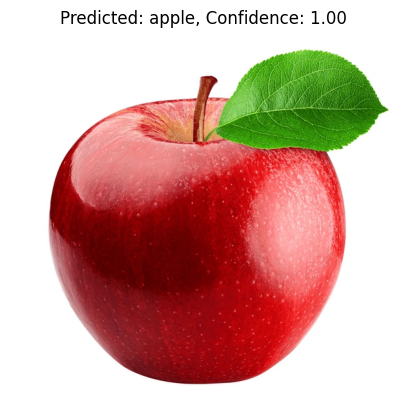

In [ ]:
plt.imshow(plt.imread(test_image_path))
plt.title(f'Predicted: {predicted_class_name}, Confidence: {np.max(predictions):.2f}')
plt.axis('off')
plt.show()


In [ ]:
model.save('my_model.h5')  # Saves the model to a HDF5 file


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model.keras')
